# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
import pandas as pd
import numpy as np
from spicy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
employee = pd.read_csv('data/Employee.csv')

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
salaries_dep = employee.groupby('Department')
salaries_dep['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [31]:
# Method 2
pd.pivot(employee, index='Name', columns = 'Department')['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [32]:
pd.pivot(employee,index='Name',columns=['Department','Title'])['Salary'].mean()

Department  Title    
IT          analyst      32.5
HR          analyst      32.5
Sales       associate    55.0
IT          VP           70.0
            associate    60.0
HR          VP           70.0
dtype: float64

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [33]:
employee.pivot_table(index='Title', 
                     values=['Years','Salary'],
                             aggfunc='mean')


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [34]:
employee.pivot_table(index=['Department','Title'],
                            values=['Salary','Name'],
                                    aggfunc={'Salary':'mean','Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [35]:
employee.pivot_table(index=['Department','Title'],
                            values='Salary',
                            aggfunc={'median','min','max','std'})


max  median  min       std
Department Title                                
HR         VP          70    70.0   70       NaN
           analyst     35    32.5   30  3.535534
IT         VP          70    70.0   70       NaN
           analyst     35    32.5   30  3.535534
           associate   60    60.0   60       NaN
Sales      associate   55    55.0   55  0.000000

In [ ]:
# All the VPs have the same salary, 70k.
# The Analysts earn either 35k or 30K.
# Associates in Sales earn 55K and 60K in the IT Department. 

#### Based on your comments, fill the missing values with an appropriate value.

In [36]:
employee.pivot_table(index=['Department','Title'],
                            values='Salary',
                            aggfunc={'median','min','max','std'},
                                     fill_value=0)


max  median  min       std
Department Title                                
HR         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
IT         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
           associate   60    60.0   60  0.000000
Sales      associate   55    55.0   55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [37]:
employee.pivot_table(index=['Department'],
                            values=['Salary','Name'],
                                    aggfunc={'Salary':'sum','Name':'count'})


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [38]:
employee.pivot_table(index=['Department','Title'],
                            values=['Salary','Years'],
                                    aggfunc={'Salary':'mean','Years':'sum'})


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [40]:
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.sample(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
310,12-03-2016,284,9992,7.45,4,685.0,339,0,13,1438,275,13,10,288
66,13-07-2015,3259,12168,9.04,18,731.0,212,52,60,1725,360,39,18,425
82,29-07-2015,3138,1068,7.94,16,634.0,322,21,4,1628,292,23,16,343


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [41]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [42]:
fitbit.describe


<bound method NDFrame.describe of            Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0    08-05-2015            1934    905      0.65       0              1.355   
1    09-05-2015            3631  18925     14.11       4            611.000   
2    10-05-2015            3204  14228     10.57       1            602.000   
3    11-05-2015            2673   6756      5.02       8            749.000   
4    12-05-2015            2495    502      3.73       1            876.000   
..          ...             ...    ...       ...     ...                ...   
362  03-05-2016            3796  18588     14.13      16            599.000   
363  04-05-2016            3525  16382     12.39      16            684.000   
364  05-05-2016            3649  21913     16.40      19            701.000   
365  06-05-2016            3539  19023     14.79      15            575.000   
366  07-05-2016             304   9526      7.08       2            564.000   

     Minutes Ligh

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [43]:
fitbit[['Minutes Very Active','Steps']].corr()


,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


Text(0, 0.5, 'Steps')

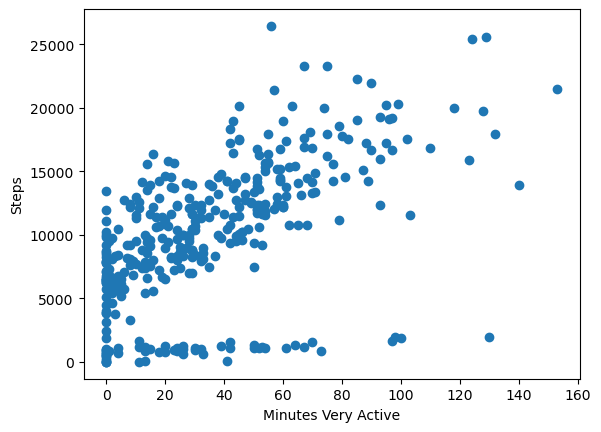

In [47]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# The plot shares a linear regression of the two variables, with a relationship that is more direct from 5000steps and above


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [48]:
fitbit[['Minutes Sedentary','Steps']].corr()


,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

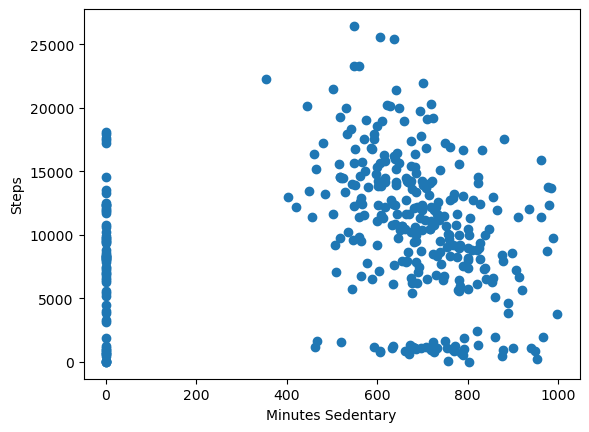

In [49]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')


In [50]:
#There is no correlation between these two variables, however, ofc it shows that the more one walks the more sedentary one is.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [51]:
fitbit_corr = fitbit[['Minutes Sedentary','Minutes Very Active','Steps']]

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:>

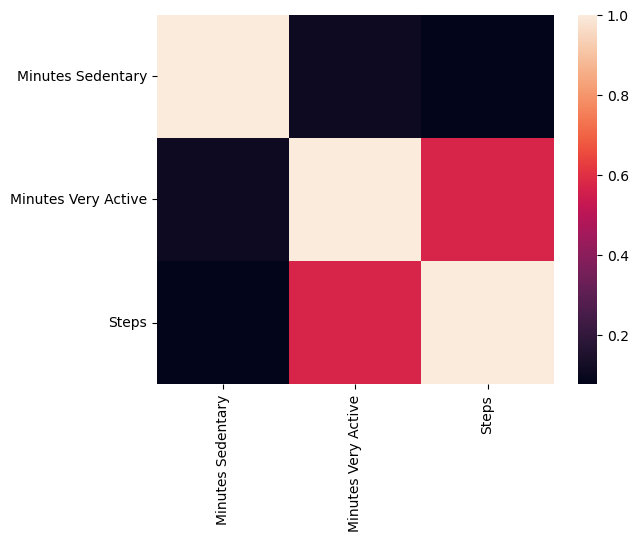

In [52]:
sns.heatmap(fitbit_corr.corr())

In [ ]:
#there seems to be almost no correlation

Text(0, 0.5, 'Steps')

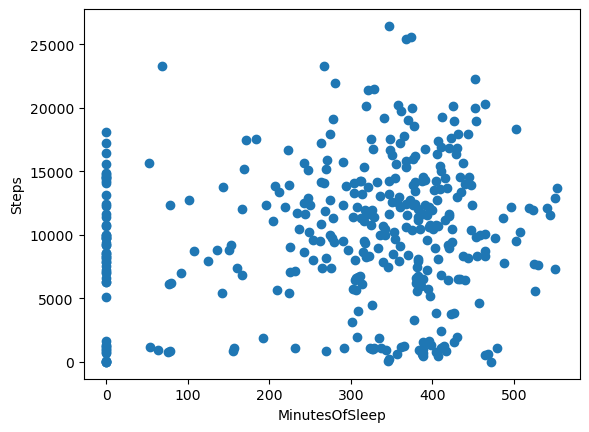

In [53]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [54]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]


<AxesSubplot:>

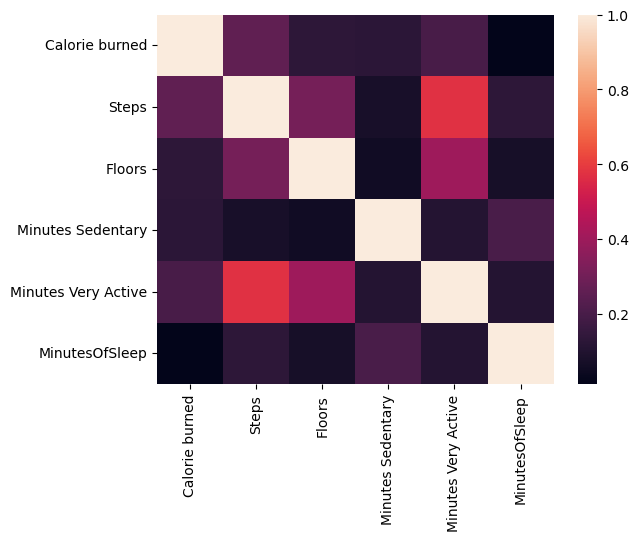

In [55]:
sns.heatmap(cor_fit.corr())

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [25]:
# Minutes Very Active is the most correlated variable. Floors and Calorie burned are also slightly correlated with steps in a positive way

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [56]:
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades.sample(3)


,Name,Study time,Grade
8,Ana,18,9
5,Eva,5,3
13,Cristina,13,8


#### Show visually the frequency distribution of the time_grades dataset.

In [57]:
time_grades.value_counts


<bound method DataFrame.value_counts of         Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2>

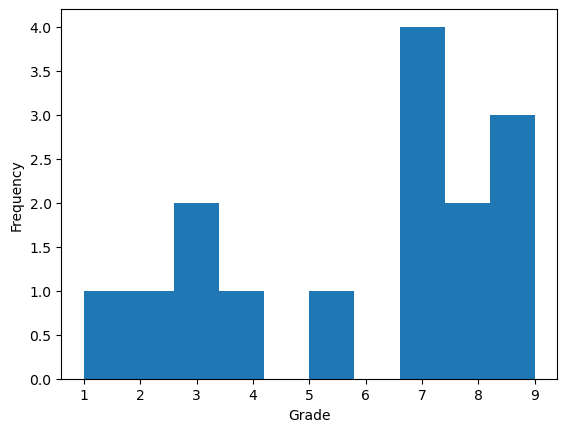

In [59]:
plt.hist(time_grades['Grade'])
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [60]:
#Pearson
np.corrcoef(time_grades['Study time'],time_grades['Grade'])


array([[1.        , 0.79804561],
       [0.79804561, 1.        ]])

In [61]:
#Spearnman
stats.spearmanr(time_grades['Study time'],time_grades['Grade'])

SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)

In [ ]:
#Similiarly they both show a strong correlation

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

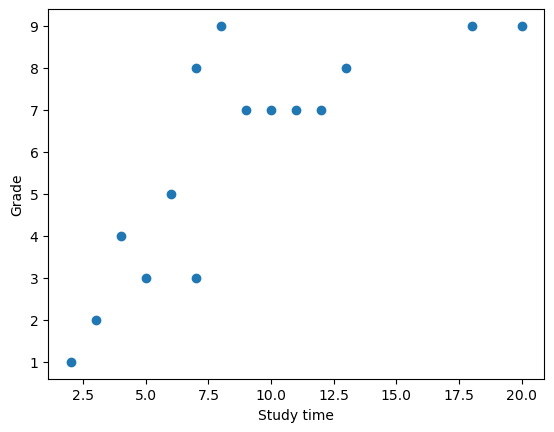

In [62]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
#The more one studies, the better the grade i.e. direct relationship

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [30]:
# Pearson correlation evaluates the linear relationship between two continuous variables
# whereas Spearman correlation evaluates the monotonic relationship